# Principal component analysis with scikit-learn

Simple example of a principal component analysis using two linearly correlated features

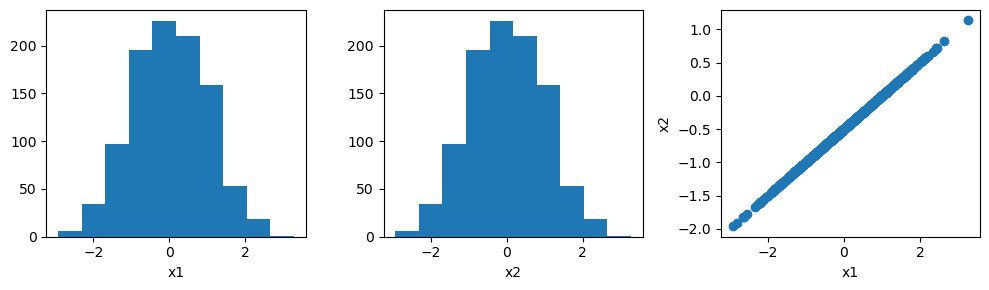

In [14]:
# import standard stuff
import matplotlib.pyplot as plt
import numpy as np

# generate two gaussian variables that are linearly correlated

noise = 0
a = 0.5
b = -0.5
x1 = np.random.normal(0,1,1000)
x2 = []
for x in x1:
    x2.append(a*x+b) 
fig,axes = plt.subplots(1,3,figsize=(10,3))
ax = axes[0]
ax.hist(x1)
ax.set_xlabel("x1")
ax = axes[1]
ax.hist(x1)
ax.set_xlabel("x2")
ax = axes[2]
ax.scatter(x1,x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
fig.tight_layout()
plt.show()

"wine" data are the results of a chemical analysis of wines grown in the same region in Italy. The analysis determined the quantities of __13 constituents__ found in each of __three__ types of wines. There are __178__ samples

In [22]:
X = np.empty((len(x1),2))
for i in range(len(x1)):
    X[i,0] = x1[i]
    X[i,1] = x2[i]
print(np.shape(X))
print(X[0])

(1000, 2)
[ 0.88564507 -0.05717747]


In [23]:
# import the PCA method from sklearn
# this will do all the work for us

from sklearn.decomposition import PCA

# we can set the number of PCA components we want to reduce the data set to
pca = PCA(n_components=2)
# there are two steps
# first, we find the principal components
pca.fit(X)

# we can then also transform the input data into 
# a representation by the three components only
Xpca = pca.transform(X)

print(np.shape(X))
print(np.shape(Xpca))



(1000, 2)
(1000, 2)


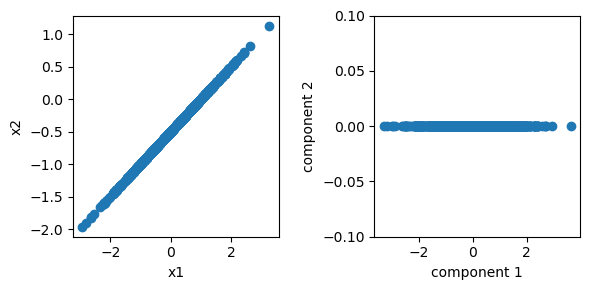

In [28]:
fig,axes = plt.subplots(1,2,figsize=(6,3))
ax = axes[0]
ax.scatter(X[:,0],X[:,1])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax = axes[1]
ax.scatter(Xpca[:,0],Xpca[:,1])
ax.set_ylim(-0.1,0.1)
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
fig.tight_layout()
plt.show()

In [29]:
# How well do the PCA components explain the variation in the original data
print(f"PCA explains {sum(pca.explained_variance_ratio_):.3} of the data variance")


PCA explains 1.0 of the data variance


How does the explained variance change with the number of components we allow?

In [30]:
# it looks like the first component can explain everyting. Let's check
pca = PCA(n_components=1)
# there are two steps
# first, we find the principal components
pca.fit(X)

# we can then also transform the input data into 
# a representation by the three components only
Xpca = pca.transform(X)

print(np.shape(X))
print(np.shape(Xpca))
print(f"PCA explains {sum(pca.explained_variance_ratio_):.3} of the data variance")

(1000, 2)
(1000, 1)
PCA explains 1.0 of the data variance


What if we add some noise to the problem?

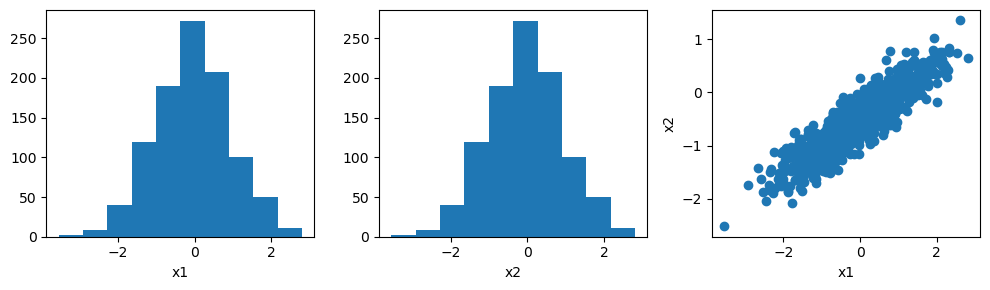

In [34]:
noise = 0.25
a = 0.5
b = -0.5
x1 = np.random.normal(0,1,1000)
x2 = []
for x in x1:
    x2.append(a*x+b+ np.random.normal(0,noise))
fig,axes = plt.subplots(1,3,figsize=(10,3))
ax = axes[0]
ax.hist(x1)
ax.set_xlabel("x1")
ax = axes[1]
ax.hist(x1)
ax.set_xlabel("x2")
ax = axes[2]
ax.scatter(x1,x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
fig.tight_layout()
plt.show()

In [35]:
X = np.empty((len(x1),2))
for i in range(len(x1)):
    X[i,0] = x1[i]
    X[i,1] = x2[i]

# Rerun the PCA with just 1 component
pca = PCA(n_components=1)
# there are two steps
# first, we find the principal components
pca.fit(X)

# we can then also transform the input data into 
# a representation by the three components only
Xpca = pca.transform(X)

print(np.shape(X))
print(np.shape(Xpca))
print(f"PCA explains {sum(pca.explained_variance_ratio_):.3} of the data variance")


(1000, 2)
(1000, 1)
PCA explains 0.962 of the data variance
